# Data Wrangling con Python

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
file_path = "/data/titanic.csv"

In [0]:
%%writefile tools.py
sb_data = "/data/sandboxes/form/data"
def sb_data_to_pandas_df(file_path, spark):
    return spark.read.csv(sb_data+file_path, header = True).toPandas()

Overwriting tools.py


In [0]:
import tools

In [0]:
tools.sb_data

'/data/sandboxes/form/data'

In [0]:
df = tools.sb_data_to_pandas_df(file_path=file_path, spark =spark)

In [0]:
columnas = df.columns.values.tolist()

## Numpy

In [0]:
import numpy as np

In [0]:
a = np.array([0,1,2,3,4,5,6,7,8,9])

In [0]:
b = np.arange(10)

In [0]:
a + b 

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [0]:
np.linspace(-10,10,20)

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

## Index and columns

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df.index

RangeIndex(start=0, stop=891, step=1)

### Set index

In [0]:
df = df.set_index("PassengerId")

In [0]:
df.loc["1"]["Name"]

'Braund, Mr. Owen Harris'

In [0]:
df.iloc[2:5,[0]]

,Survived
PassengerId,
3,1
4,1
5,0


In [0]:
min_ = 5
max_ = 10
df.loc["6",["Sex"]] = "female"

In [0]:
df.loc[[str(x) for x in range(min_,max_)],["Name","Sex"]]

,Name,Sex
PassengerId,,
5,"Allen, Mr. William Henry",male
6,"Moran, Mr. James",female
7,"McCarthy, Mr. Timothy J",male
8,"Palsson, Master. Gosta Leonard",male
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female


In [0]:
df.loc["6",["Sex"]]

Sex    female
Name: 6, dtype: object

In [0]:
df.reset_index().index

RangeIndex(start=0, stop=884, step=1)

## Formateo

In [0]:
import pandas as pd

In [0]:
#df["Survived"] = pd.to_numeric(df["Survived"])
#df["Age"] = pd.to_numeric(df["Age"])
#df["Fare"] = pd.to_numeric(df["Fare"])
#df["SibSp"] = pd.to_numeric(df["SibSp"])

In [0]:
olumnas = df.dtypes.index.values.tolist()

In [0]:
%%writefile -a tools.py

import pandas as pd

def convert_columns_to_numeric(df):
    columnas = df.dtypes.index.values.tolist()
    for c in columnas:
        try:
            df[c] = pd.to_numeric(df[c])
        except:
            pass
        


Appending to tools.py


In [0]:
tools.convert_columns_to_numeric(df)
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

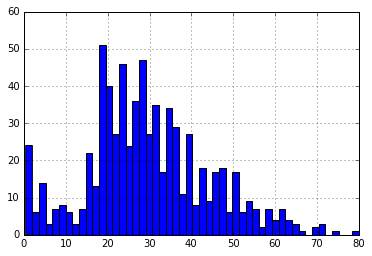

In [0]:
%matplotlib inline
df["Age"].hist(bins = 50)

In [0]:
df[df["Age"] > 60].shape

(22, 11)

In [0]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df["Name"].apply(lambda name: name[1]).value_counts()

a    224
o    141
e    115
i     92
u     45
l     40
r     38
h     32
t     17
n     16
c     13
y     10
s     10
k      9
m      8
M      8
'      6
b      6
C      5
d      5
B      4
v      4
H      4
F      4
N      3
p      3
j      3
O      3
P      3
K      3
W      2
D      2
G      2
A      2
R      2
L      2
T      1
Y      1
S      1
w      1
J      1
Name: Name, dtype: int64

In [0]:
df["Embarked"] = df["Embarked"].astype("category")

In [0]:
df["Embarked"].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [0]:
df.Embarked.cat.categories

Index(['C', 'Q', 'S'], dtype='object')

### fechas

In [0]:
from datetime import datetime

In [0]:
d1 = datetime.strptime("10-10-10","%y-%m-%d")

In [0]:
d2 = datetime.strptime("101010","%y%m%d")

In [0]:
d3 = datetime.strptime("2010-10-10","%Y-%m-%d")

In [0]:
type(d1.year)

int

In [0]:
datetime.strftime(d1, "%Y-%m-%d")

'2010-10-10'

### Date example

In [0]:
data = tools.sb_data_to_pandas_df(file_path="/data/dow_jones_index.data",
                                 spark = spark)

In [0]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,None,None,$16.71,$15.97,-4.42849,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223028,239655616,$16.19,$15.79,-2.47066,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.02495926,242963398,$15.87,$16.13,1.63831,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500109,138428495,$16.18,$17.14,5.93325,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987451735,151379173,$17.33,$17.37,0.230814,97,0.175029


In [0]:
data["date"] = data["date"].apply(lambda d : datetime.strptime(d,"%m/%d/%Y"))

In [0]:
data["date"].apply(lambda d:d.day)

0       7
1      14
2      21
3      28
4       4
5      11
6      18
7      25
8       4
9      11
10     18
11     25
12      7
13     14
14     21
15     28
16      4
17     11
18     18
19     25
20      4
21     11
22     18
23     25
24      7
25     14
26     21
27     28
28      4
29     11
       ..
720     3
721    10
722    17
723    24
724     1
725     8
726    15
727    21
728    29
729     6
730    13
731    20
732    27
733     3
734    10
735    17
736    24
737     1
738     8
739    15
740    21
741    29
742     6
743    13
744    20
745    27
746     3
747    10
748    17
749    24
Name: date, Length: 750, dtype: int64

In [0]:
data["date_day"] = data["date"].dt.day

In [0]:
pd.to_datetime("101010")

Timestamp('2010-10-10 00:00:00')

## Apply

In [0]:
[type(i) for i in df.loc[df["Age"].idxmax()]]

[numpy.int64,
 numpy.int64,
 str,
 str,
 numpy.float64,
 numpy.int64,
 numpy.int64,
 str,
 numpy.float64,
 str,
 str]

In [0]:
for i in df.loc[df["Age"].idxmax()]:
    print(type(i))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>


In [0]:
age = df["Age"]

In [0]:
def is_pair(x):
    """
    >> is_pair(4)
    True
    >> is_pair(3)
    False
    """
    return x%2==0

In [0]:
is_pair(2)

True

In [0]:
age.apply(is_pair)

PassengerId
1       True
2       True
3       True
4      False
5      False
6      False
7       True
8       True
9      False
10      True
11      True
12      True
13      True
14     False
15      True
16     False
17      True
18     False
19     False
20     False
21     False
22      True
23     False
24      True
25      True
26      True
27     False
28     False
29     False
30     False
       ...  
862    False
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870     True
871     True
872    False
873    False
874    False
875     True
876    False
877     True
878    False
879    False
880     True
881    False
882    False
883     True
884     True
885    False
886    False
887    False
888    False
889    False
890     True
891     True
Name: Age, Length: 891, dtype: bool

In [0]:
age.apply(lambda x: x%2==0 )

PassengerId
1       True
2       True
3       True
4      False
5      False
6      False
7       True
8       True
9      False
10      True
11      True
12      True
13      True
14     False
15      True
16     False
17      True
18     False
19     False
20     False
21     False
22      True
23     False
24      True
25      True
26      True
27     False
28     False
29     False
30     False
       ...  
862    False
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870     True
871     True
872    False
873    False
874    False
875     True
876    False
877     True
878    False
879    False
880     True
881    False
882    False
883     True
884     True
885    False
886    False
887    False
888    False
889    False
890     True
891     True
Name: Age, Length: 891, dtype: bool

In [0]:
df["ratio1"] = df.apply(lambda row: row["Age"]/row["Pclass"], 
                        axis = 1)

In [0]:
def ratio(row, col1, col2):
    return row[col1]/row[col2]

In [0]:
df["ratio2"] = df.apply(lambda row: ratio(row, "Age", "Pclass"), 
                        axis = 1)

In [0]:
df["ratio3"] = df[["Age", "Pclass"]].apply(lambda row: ratio(row, 
                                                             row.index[0], 
                                                             row.index[1]), 
                                           axis = 1)

## Ejemplo dataframe 

In [0]:
df2 = pd.DataFrame({"maestra":np.random.rand(10)})

In [0]:
letters = "abcdefghijklmnopqrstuvwxyz"

In [0]:
for l in letters:
    df2[l] = np.random.rand(10)

In [0]:
df2.values

array([[5.26656333e-01, 8.81455941e-01, 5.77513030e-01, 6.37341021e-01,
        8.05071036e-01, 3.00405677e-01, 8.42069604e-01, 6.63191366e-01,
        4.88843722e-01, 3.28561420e-01, 7.14361558e-01, 2.56799946e-01,
        9.72767239e-01, 8.84659230e-01, 8.73756203e-01, 7.53385374e-01,
        7.97754428e-01, 5.93103869e-01, 9.69289340e-02, 6.81533291e-01,
        2.88972491e-01, 5.84768470e-03, 9.48632980e-01, 2.86534752e-01,
        8.09180517e-01, 9.39408862e-01, 2.12670048e-01],
       [9.09478898e-01, 8.09431562e-01, 2.57722641e-01, 5.20598548e-01,
        1.93177103e-01, 7.79501217e-01, 2.44815487e-01, 3.31828812e-01,
        5.92477901e-01, 4.59058350e-01, 5.28541144e-01, 5.95544077e-02,
        4.48972517e-02, 8.55303925e-01, 7.87575357e-01, 1.64755486e-01,
        7.75470863e-01, 9.54093042e-01, 8.93147468e-01, 6.47729575e-02,
        7.85686785e-01, 7.56360930e-01, 4.55777250e-01, 7.42019084e-01,
        1.04275762e-01, 6.20834198e-01, 5.53557299e-01],
       [3.59105075e-01

In [0]:
df2.apply(lambda row:row.idxmax(), axis = 1)

0          l
1          q
2          b
3          y
4          u
5          v
6          w
7    maestra
8          m
9          z
dtype: object

In [0]:
df2.idxmax(axis=1)

0          l
1          q
2          b
3          y
4          u
5          v
6          w
7    maestra
8          m
9          z
dtype: object

## Nulos

In [0]:
np.nan

nan

In [0]:
pd.isnull(np.nan)

True

In [0]:
%time
pd.isnull(df["Age"])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.87 µs


PassengerId
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29      True
30      True
       ...  
862    False
863    False
864     True
865    False
866    False
867    False
868    False
869     True
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879     True
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [0]:
%time
df["Age"].apply(pd.isnull)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


PassengerId
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29      True
30      True
       ...  
862    False
863    False
864     True
865    False
866    False
867    False
868    False
869     True
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879     True
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [0]:
df.select_dtypes(include=[int, float]).sum()

Survived      342.000000
Pclass       2057.000000
Age         21205.170000
SibSp         466.000000
Parch         340.000000
Fare        28693.949300
ratio1      12670.808333
ratio2      12670.808333
ratio3      12670.808333
dtype: float64

In [0]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
ratio1      177
ratio2      177
ratio3      177
dtype: int64

In [0]:
df.sort_values

<bound method DataFrame.sort_values of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28  

In [0]:
df.isnull().sum(axis=1).sort_values(ascending=False)

PassengerId
668    5
261    5
236    5
654    5
651    5
649    5
241    5
242    5
644    5
640    5
251    5
634    5
257    5
630    5
265    5
590    5
271    5
275    5
278    5
614    5
613    5
612    5
603    5
602    5
599    5
597    5
296    5
594    5
657    5
230    5
      ..
292    0
600    0
610    0
619    0
276    0
274    0
622    0
270    0
269    0
626    0
264    0
263    0
628    0
258    0
216    0
633    0
253    0
252    0
249    0
642    0
246    0
646    0
648    0
660    0
231    0
663    0
225    0
672    0
219    0
446    0
Length: 891, dtype: int64

In [0]:
age_mean = df["Age"].median()

In [0]:
df["Age"] = df["Age"].fillna(age_mean)

### Eliminar nulos

In [0]:
df.shape

(884, 15)

In [0]:
drop_columns = df.columns[["ratio" in c for c in df.columns.values]]

In [0]:
df = df.drop(drop_columns,axis=1)

In [0]:
df.isnull().any()

Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
ratio1          True
ratio2          True
ratio3          True
BilleteCaro    False
dtype: bool

In [0]:
df.dropna(axis=1, 
          how="any", 
          subset = df.columns[["ratio" in c for c in df.columns.values]])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BilleteCaro
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,False
6,0,3,"Moran, Mr. James",female,28.0,0,0,330877,8.4583,None,Q,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S,False
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S,False


In [0]:
df.dropna().shape

(180, 15)

In [0]:
df = df.drop_duplicates()

## outliers

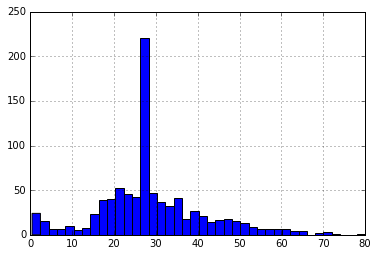

In [0]:
%matplotlib inline
df.Age.hist(bins = 40)

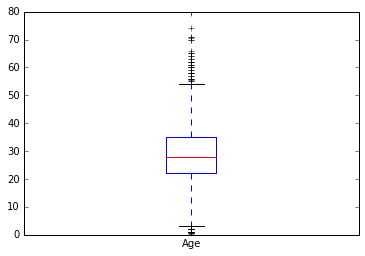

In [0]:
df.Age.plot.box()

In [0]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
df["BilleteCaro"] = df["Fare"]>31

In [0]:
df.groupby(df["Fare"]>31).size()/df.shape[0]

Fare
False    0.750842
True     0.249158
dtype: float64

In [0]:
df_cleaned = df[df["Age"]< 70]


In [0]:
df_cleaned.shape

(884, 15)

## pivot

In [0]:
df.shape

(884, 12)

In [0]:
df.pivot_table(index = "Embarked", 
               columns="Survived",
              aggfunc=np.size)["Age"]

Survived,0,1
Embarked,,
C,73.0,93.0
Q,46.0,30.0
S,424.0,216.0


In [0]:
pd.crosstab(df["Embarked"],df["Survived"])

Survived,0,1
Embarked,,
C,73,93
Q,46,30
S,424,216


In [0]:
df.stack().loc[["1"],["Survived"]]

PassengerId          
1            Survived    0
dtype: object

In [0]:
df.stack().iloc[[1,3]]

PassengerId        
1            Pclass       3
             Sex       male
dtype: object

## Agrupar

In [0]:
pd.options.display.max_columns = 25

In [0]:
df.groupby("Embarked").describe(include="all")

Age                                                            \
          count unique top freq       mean        std   min     25%   50%   
Embarked                                                                    
C         166.0    NaN NaN  NaN  29.686265  12.931583  0.42  23.125  28.0   
Q          76.0    NaN NaN  NaN  27.473684   8.868256  2.00  28.000  28.0   
S         640.0    NaN NaN  NaN  28.966797  12.685415  0.67  22.000  28.0   

                      BilleteCaro ...  Survived Ticket                      \
            75%   max       count ...       max  count unique     top freq   
Embarked                          ...                                        
C         35.75  65.0         166 ...       1.0    166    120    2666    4   
Q         28.00  65.0          76 ...       1.0     76     65  382652    5   
S         35.25  66.0         640 ...       1.0    640    491  347082    7   

                                             
         mean  std  min  25%  50%  75%  max  
Embarked                                     
C         NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Q         NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S         NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 121 columns]

## Cruzar